In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [56]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [57]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [58]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [59]:
df['Next_Tmin'].fillna(23.1,inplace=True)

In [60]:
median=df['Present_Tmax'].median()
median


29.9

In [61]:
df['Present_Tmax'].fillna(29.9,inplace=True)

In [62]:
median1=df['Present_Tmin'].median()
median1


23.4

In [63]:
df['Present_Tmin'].fillna(23.4,inplace=True)

In [64]:
median2=df['LDAPS_RHmin'].median()
median2


55.03902435

In [65]:
df['LDAPS_RHmin'].fillna(55.04,inplace=True)

In [66]:
median3=df['LDAPS_RHmax'].median()
median3


89.79347992

In [67]:
df['LDAPS_RHmax'].fillna(89.8,inplace=True)

In [68]:
median4=df['LDAPS_Tmax_lapse'].median()
median4


29.70342642

In [69]:
df['LDAPS_Tmax_lapse'].fillna(29.7,inplace=True)

In [70]:
median5=df['LDAPS_Tmin_lapse'].median()
median5


23.76019884

In [71]:
df['LDAPS_Tmin_lapse'].fillna(23.76,inplace=True)

In [72]:
median6=df['LDAPS_WS'].median()
median6


6.547470301

In [73]:
df['LDAPS_WS'].fillna(6.55,inplace=True)

In [74]:
median7=df['LDAPS_LH'].median()
median7


56.86548154

In [75]:
df['LDAPS_LH'].fillna(56.86,inplace=True)

In [76]:
median8=df['LDAPS_CC1'].median()
median8


0.315696837

In [77]:
df['LDAPS_CC1'].fillna(0.32,inplace=True)

In [78]:
median9=df['LDAPS_CC2'].mean()
median9


0.3560804372839651

In [79]:
df['LDAPS_CC2'].fillna(0.35,inplace=True)

In [80]:
median10=df['LDAPS_CC3'].median()
median10


0.262554604

In [81]:
df['LDAPS_CC3'].fillna(0.26,inplace=True)

In [82]:
median11=df['LDAPS_CC4'].median()
median11


0.227664469

In [83]:
df['LDAPS_CC4'].fillna(0.23,inplace=True)

In [84]:
median12=df['LDAPS_PPT1'].mean()
median12


0.5919945266984499

In [85]:
df['LDAPS_PPT1'].fillna(0.6,inplace=True)

In [86]:
median13=df['LDAPS_PPT2'].mean()
median13


0.4850025590969128

In [87]:
df['LDAPS_PPT2'].fillna(0.48,inplace=True)

In [88]:
median14=df['LDAPS_PPT3'].mean()
median14


0.2781996392747167

In [89]:
df['LDAPS_PPT3'].fillna(0.28,inplace=True)

In [90]:
median15=df['LDAPS_PPT4'].mean()
median15


0.26940734997772564

In [91]:
df['LDAPS_PPT4'].fillna(0.27,inplace=True)

In [92]:
median16=df['Next_Tmax'].median()
median16


30.5

In [93]:
df['Next_Tmax'].fillna(30.5,inplace=True)

In [94]:
median17=df['Next_Tmin'].median()
median17

23.1

In [95]:
df['Next_Tmin'].fillna(23.1,inplace=True)

In [96]:
df.dropna(inplace=True)

In [97]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [98]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [99]:
df['Day_no']=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.weekday
df['Month']=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.month
df['Year']=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.year

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\273504729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Solar radiation'],bins = 10)


<Axes: ylabel='Density'>

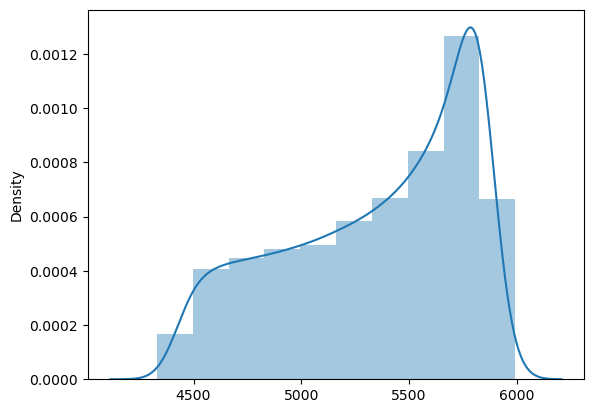

In [100]:
sns.distplot(x=df['Solar radiation'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\2542238286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Slope'],bins = 10)


<Axes: ylabel='Density'>

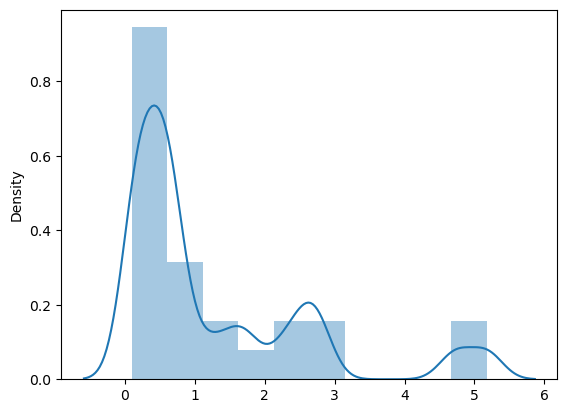

In [101]:
sns.distplot(x=df['Slope'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\2542238286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Slope'],bins = 10)


<Axes: ylabel='Density'>

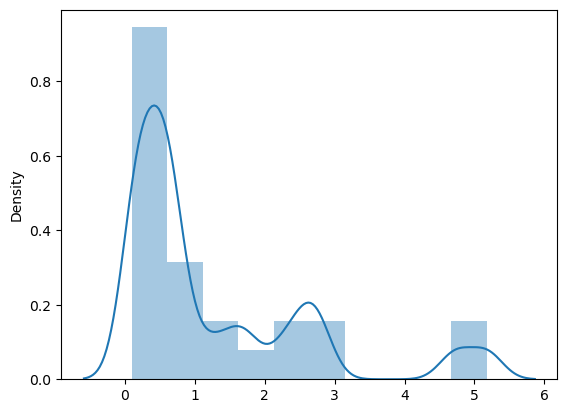

In [102]:
sns.distplot(x=df['Slope'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\3991631063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['lat'],bins = 10)


<Axes: ylabel='Density'>

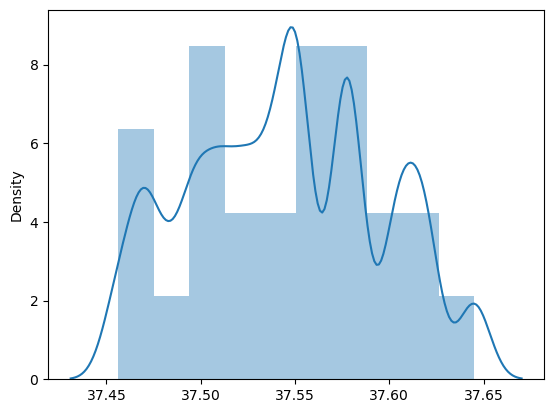

In [103]:
sns.distplot(x=df['lat'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\1060435573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['lon'],bins = 10)


<Axes: ylabel='Density'>

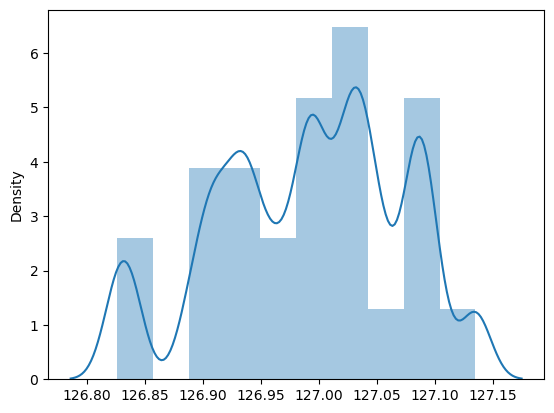

In [104]:
sns.distplot(x=df['lon'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\172717993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Present_Tmax'],bins = 10)


<Axes: ylabel='Density'>

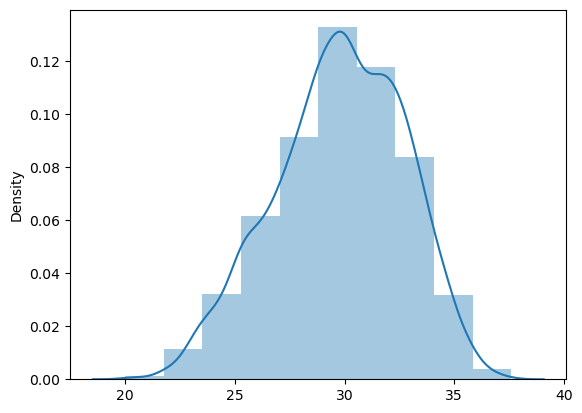

In [105]:
sns.distplot(x=df['Present_Tmax'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\1802546093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Present_Tmin'],bins = 10)


<Axes: ylabel='Density'>

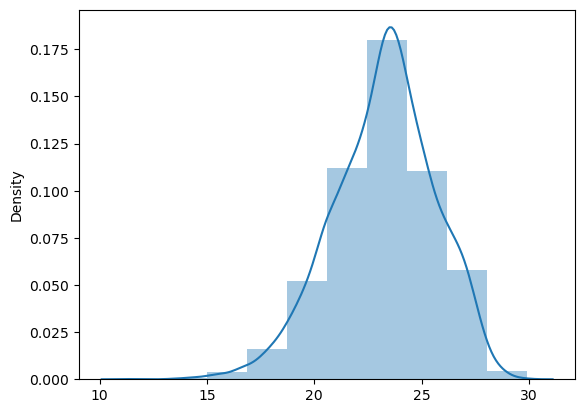

In [106]:
sns.distplot(x=df['Present_Tmin'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\1601273539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Next_Tmax'],bins = 10)


<Axes: ylabel='Density'>

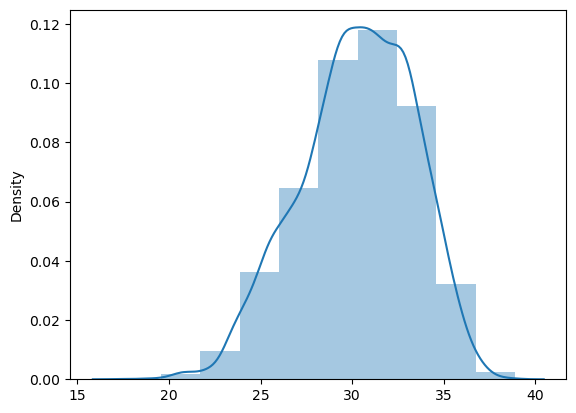

In [107]:
sns.distplot(x=df['Next_Tmax'],bins = 10)

C:\Users\jcp95\AppData\Local\Temp\ipykernel_12260\2772803760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Next_Tmin'],bins = 10)


<Axes: ylabel='Density'>

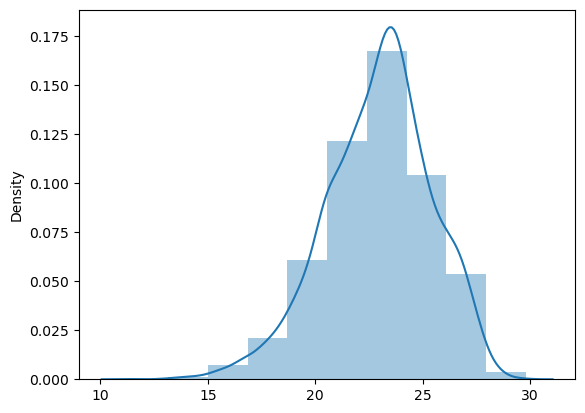

In [108]:
sns.distplot(x=df['Next_Tmin'],bins = 10)

<Axes: xlabel='Next_Tmax', ylabel='Next_Tmin'>

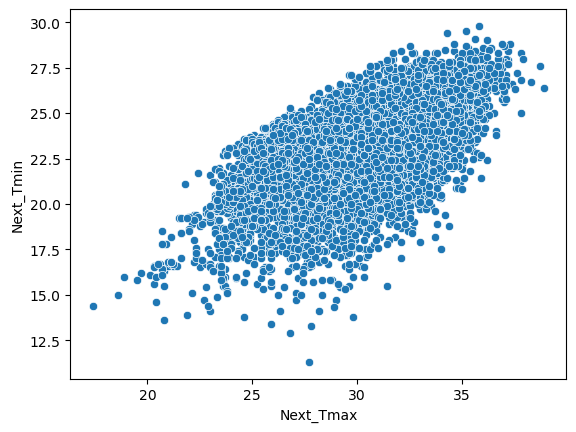

In [109]:
sns.scatterplot(x='Next_Tmax',y='Next_Tmin',data=df)

<Axes: xlabel='Present_Tmax', ylabel='Present_Tmin'>

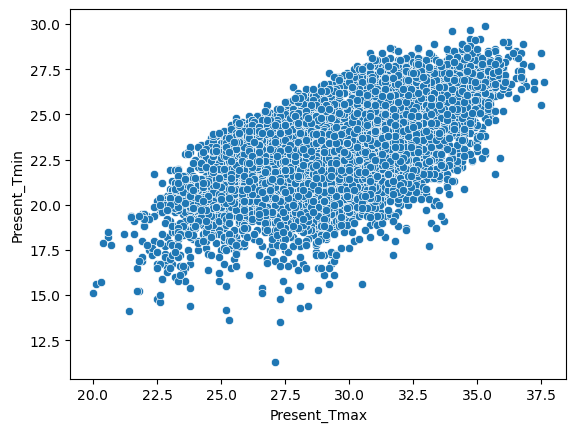

In [110]:
sns.scatterplot(x='Present_Tmax',y='Present_Tmin',data=df)

<Axes: xlabel='Present_Tmax', ylabel='Next_Tmax'>

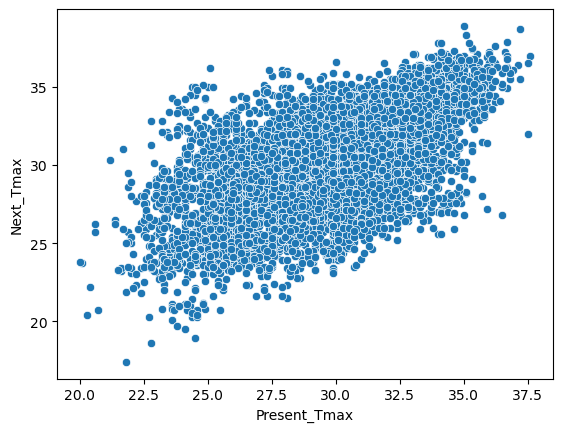

In [111]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)

<Axes: xlabel='Present_Tmin', ylabel='Next_Tmin'>

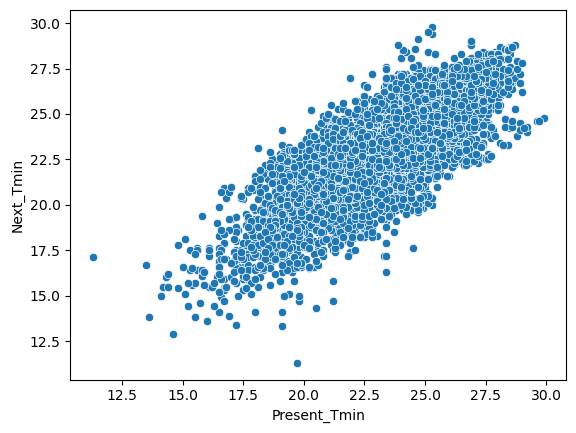

In [112]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)

<Axes: xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

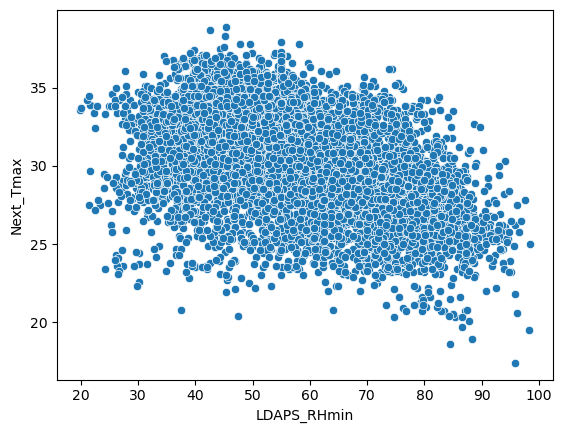

In [113]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

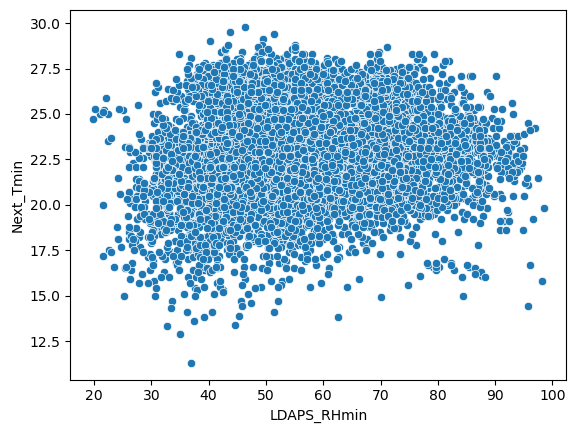

In [114]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)

<Axes: xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

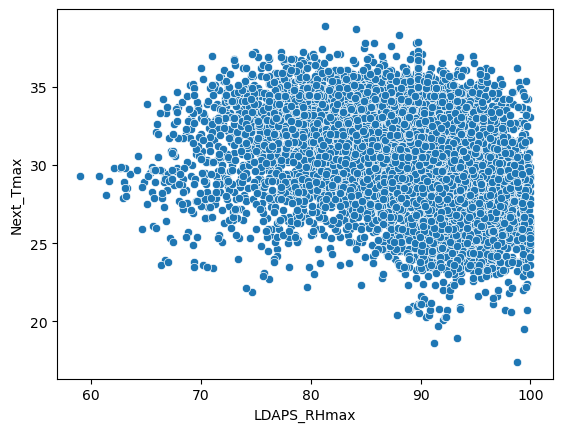

In [115]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

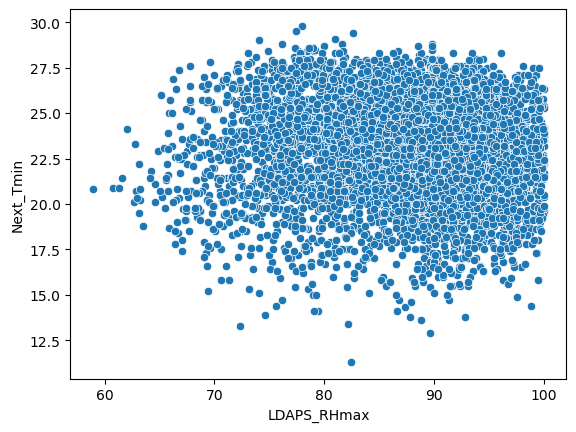

In [116]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmin',data=df)

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

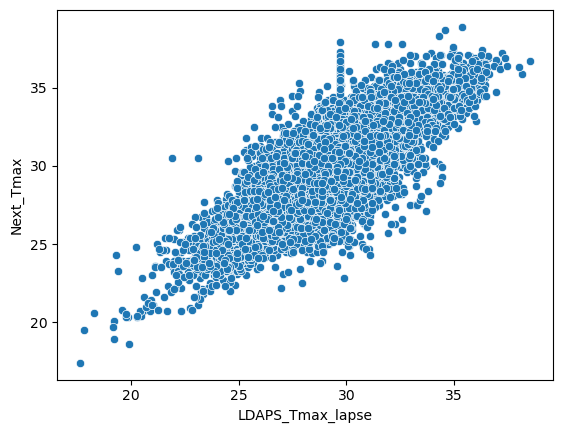

In [117]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

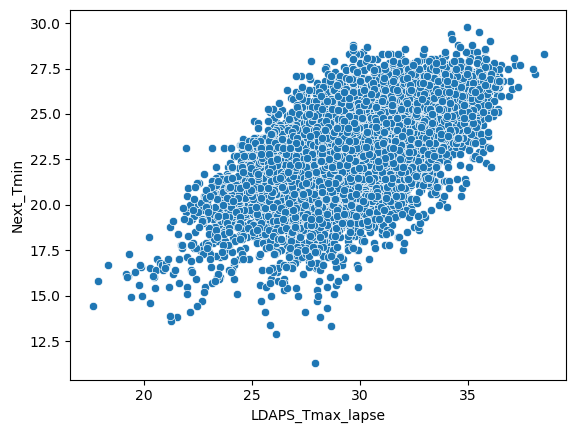

In [118]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df)

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

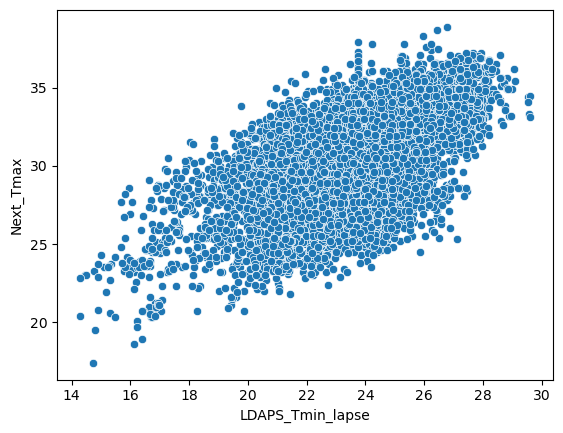

In [119]:
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

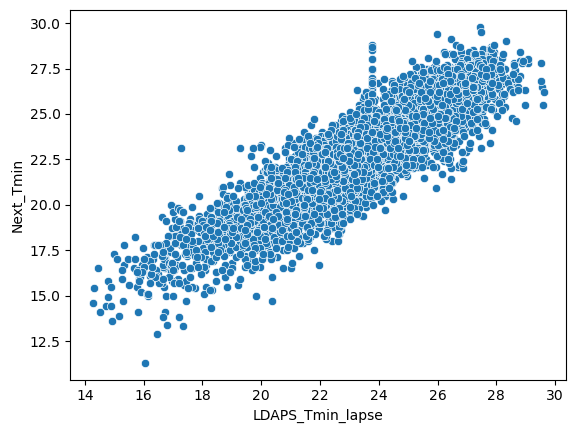

In [120]:
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

<Axes: xlabel='LDAPS_WS', ylabel='Next_Tmax'>

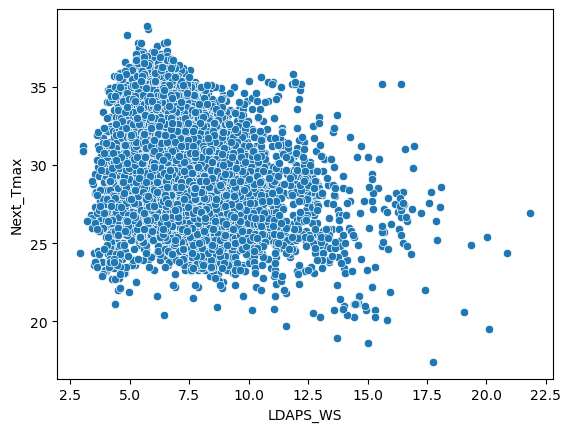

In [121]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_WS', ylabel='Next_Tmin'>

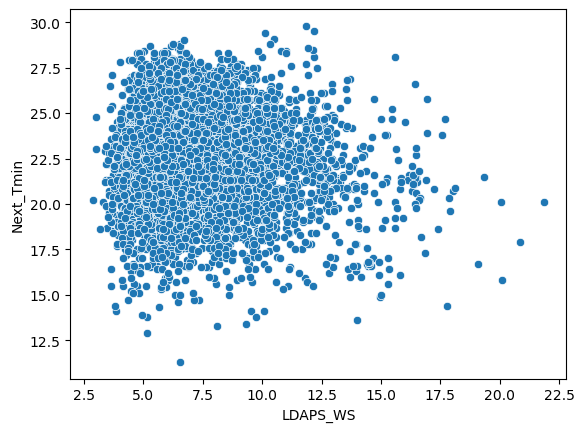

In [122]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmin',data=df)

<Axes: xlabel='LDAPS_LH', ylabel='Next_Tmax'>

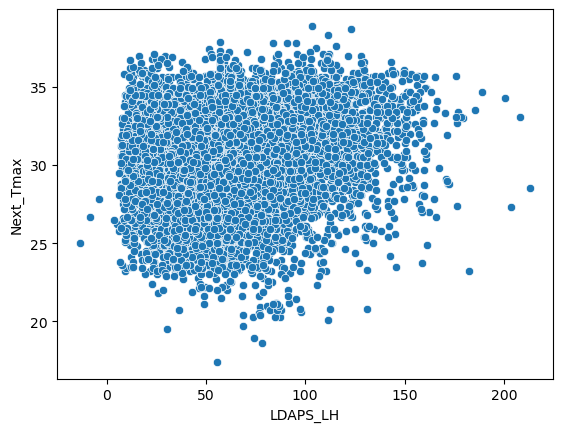

In [123]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_LH', ylabel='Next_Tmin'>

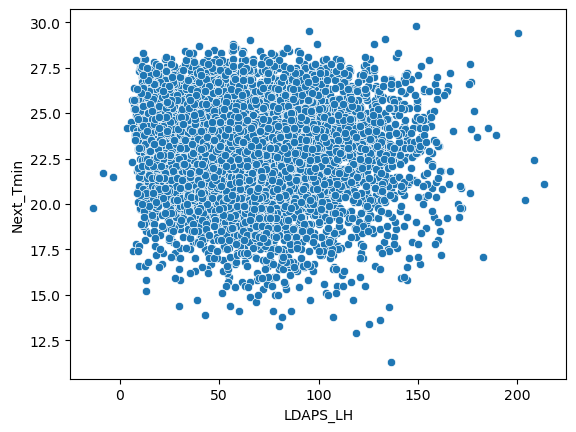

In [124]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmin',data=df)

<Axes: xlabel='lat', ylabel='Next_Tmax'>

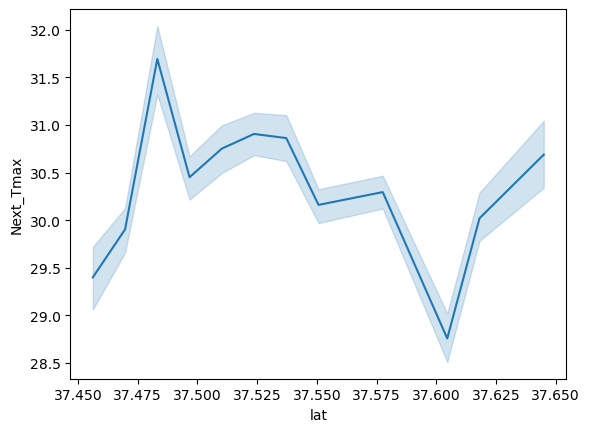

In [125]:
sns.lineplot(x='lat',y='Next_Tmax',data=df)

<Axes: xlabel='lat', ylabel='Next_Tmin'>

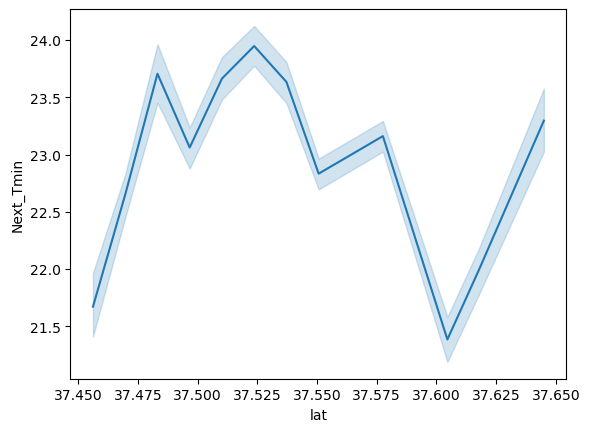

In [126]:
sns.lineplot(x='lat',y='Next_Tmin',data=df)

<Axes: xlabel='lon', ylabel='Next_Tmax'>

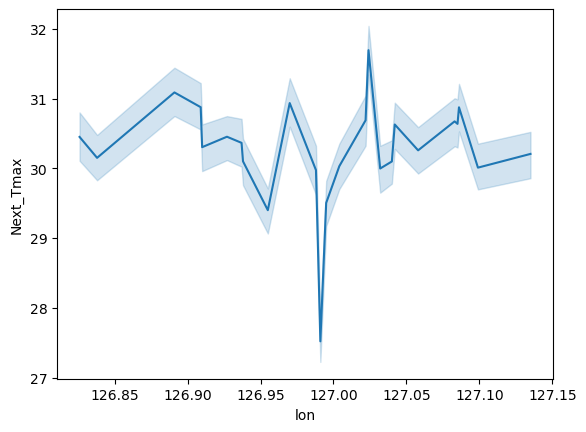

In [127]:
sns.lineplot(x='lon',y='Next_Tmax',data=df)

<Axes: xlabel='lon', ylabel='Next_Tmin'>

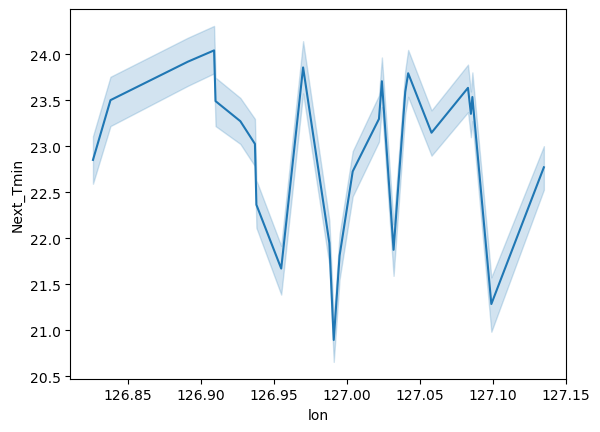

In [128]:
sns.lineplot(x='lon',y='Next_Tmin',data=df)

<Axes: xlabel='Slope', ylabel='Next_Tmin'>

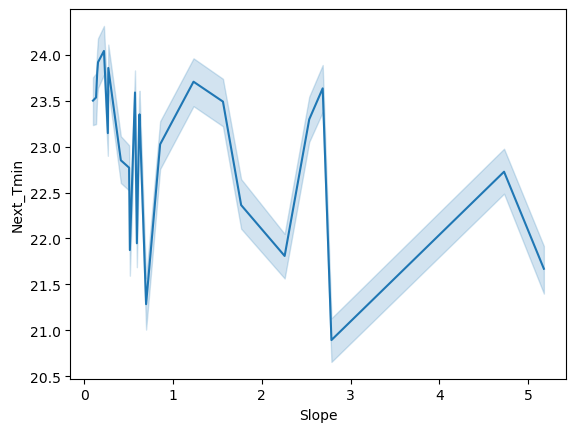

In [129]:
sns.lineplot(x='Slope',y='Next_Tmin',data=df)

<Axes: xlabel='Slope', ylabel='Next_Tmin'>

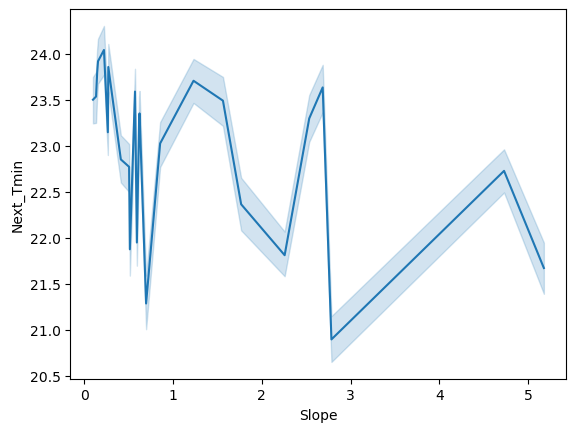

In [130]:
sns.lineplot(x='Slope',y='Next_Tmin',data=df)

**Lets divide the dataset into independent and dependent feature**

In [131]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day_no  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2       6   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5       6   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9       6   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3       6   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5       6   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [132]:
X=df.drop(['Date','Next_Tmax','Next_Tmin'],axis=1)#1st independent
y=df['Next_Tmax']#1st dependent
z=df['Next_Tmin']#2nd dependent

In [133]:
X.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Day_no  Month  Year  
0      5992.895996       6      6  2013  
1      5869.312500       6      6  2013  
2      5863.555664       6      6  2013  
3      5856.964844       6      6  2013  
4      5859.552246       6      6  2013  

[5 rows x 25 columns]

In [134]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [135]:
z.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [136]:
X.shape

(7750, 25)

In [137]:
y.shape

(7750,)

In [138]:
z.shape

(7750,)

**Lets check correlation fo all the independnet feature for feature selection.**

In [139]:
X.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112712      0.131800    -0.066792   
Present_Tmax      1.127123e-01      1.000000      0.617708    -0.207834   
Present_Tmin      1.317998e-01      0.617708      1.000000     0.119517   
LDAPS_RHmin      -6.679165e-02     -0.207834      0.119517     1.000000   
LDAPS_RHmax      -1.671638e-01     -0.303296     -0.015917     0.578099   
LDAPS_Tmax_lapse  6.922299e-02      0.569108      0.462438    -0.568521   
LDAPS_Tmin_lapse  1.049050e-01      0.623273      0.763468     0.087296   
LDAPS_WS          5.292452e-03     -0.127261     -0.041562     0.292614   
LDAPS_LH         -1.335571e-01      0.132081     -0.014449    -0.073243   
LDAPS_CC1         6.920867e-03     -0.314965      0.080682     0.613442   
LDAPS_CC2         3.397698e-03     -0.215655      0.088566     0.745152   
LDAPS_CC3         6.942288e-04     -0.147257     -0.007221     0.689352   
LDAPS_CC4         6.127178e-03     -0.144148     -0.049228     0.513560   
LDAPS_PPT1       -2.734746e-03     -0.114393      0.109625     0.260789   
LDAPS_PPT2       -8.327957e-03     -0.104797      0.064409     0.390445   
LDAPS_PPT3       -1.260945e-02     -0.126702     -0.051814     0.238604   
LDAPS_PPT4       -1.052866e-02     -0.105705     -0.068872     0.165627   
lat              -2.376097e-01     -0.054177     -0.080591     0.085904   
lon              -1.187626e-01      0.007497     -0.045608    -0.077691   
DEM              -2.559703e-01     -0.188796     -0.252542     0.100937   
Slope            -9.011266e-02     -0.107408     -0.148421     0.122589   
Solar radiation  -1.901065e-02     -0.026970      0.051718     0.243665   
Day_no            9.690377e-18      0.017553      0.028445     0.049966   
Month            -1.486474e-16      0.146058      0.087394    -0.189599   
Year              1.435563e-15      0.060060      0.037786    -0.002046   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.167164          0.069223          0.104905  0.005292   
Present_Tmax        -0.303296          0.569108          0.623273 -0.127261   
Present_Tmin        -0.015917          0.462438          0.763468 -0.041562   
LDAPS_RHmin          0.578099         -0.568521          0.087296  0.292614   
LDAPS_RHmax          1.000000         -0.377190         -0.116879  0.132932   
LDAPS_Tmax_lapse    -0.377190          1.000000          0.652940 -0.317212   
LDAPS_Tmin_lapse    -0.116879          0.652940          1.000000 -0.134152   
LDAPS_WS             0.132932         -0.317212         -0.134152  1.000000   
LDAPS_LH             0.236723          0.045145         -0.138007  0.002620   
LDAPS_CC1            0.435665         -0.441006          0.009232  0.288462   
LDAPS_CC2            0.390659         -0.526431          0.046278  0.259595   
LDAPS_CC3            0.225583         -0.544191         -0.045888  0.241674   
LDAPS_CC4            0.129075         -0.432093         -0.082247  0.219239   
LDAPS_PPT1           0.268563         -0.117189          0.034241  0.143783   
LDAPS_PPT2           0.228773         -0.249765         -0.003376  0.183520   
LDAPS_PPT3           0.133375         -0.196160         -0.094481  0.152048   
LDAPS_PPT4           0.116409         -0.168064         -0.100734  0.134070   
lat                  0.194745         -0.043896         -0.098009  0.034589   
lon                  0.024221          0.089050         -0.028429 -0.061782   
DEM                  0.176389         -0.180867         -0.197241  0.189051   
Slope                0.218911         -0.164271         -0.187617  0.169502   
Solar radiation      0.146945          0.046086          0.158038  0.121495   
Day_no               0.027622         -0.003779          0.029889  0.012284   
Month               -0.117212          0.097612          0.023806 -0.112831   
Year                -0.141984          0.016199         -0.004700 -0.111684   

                 

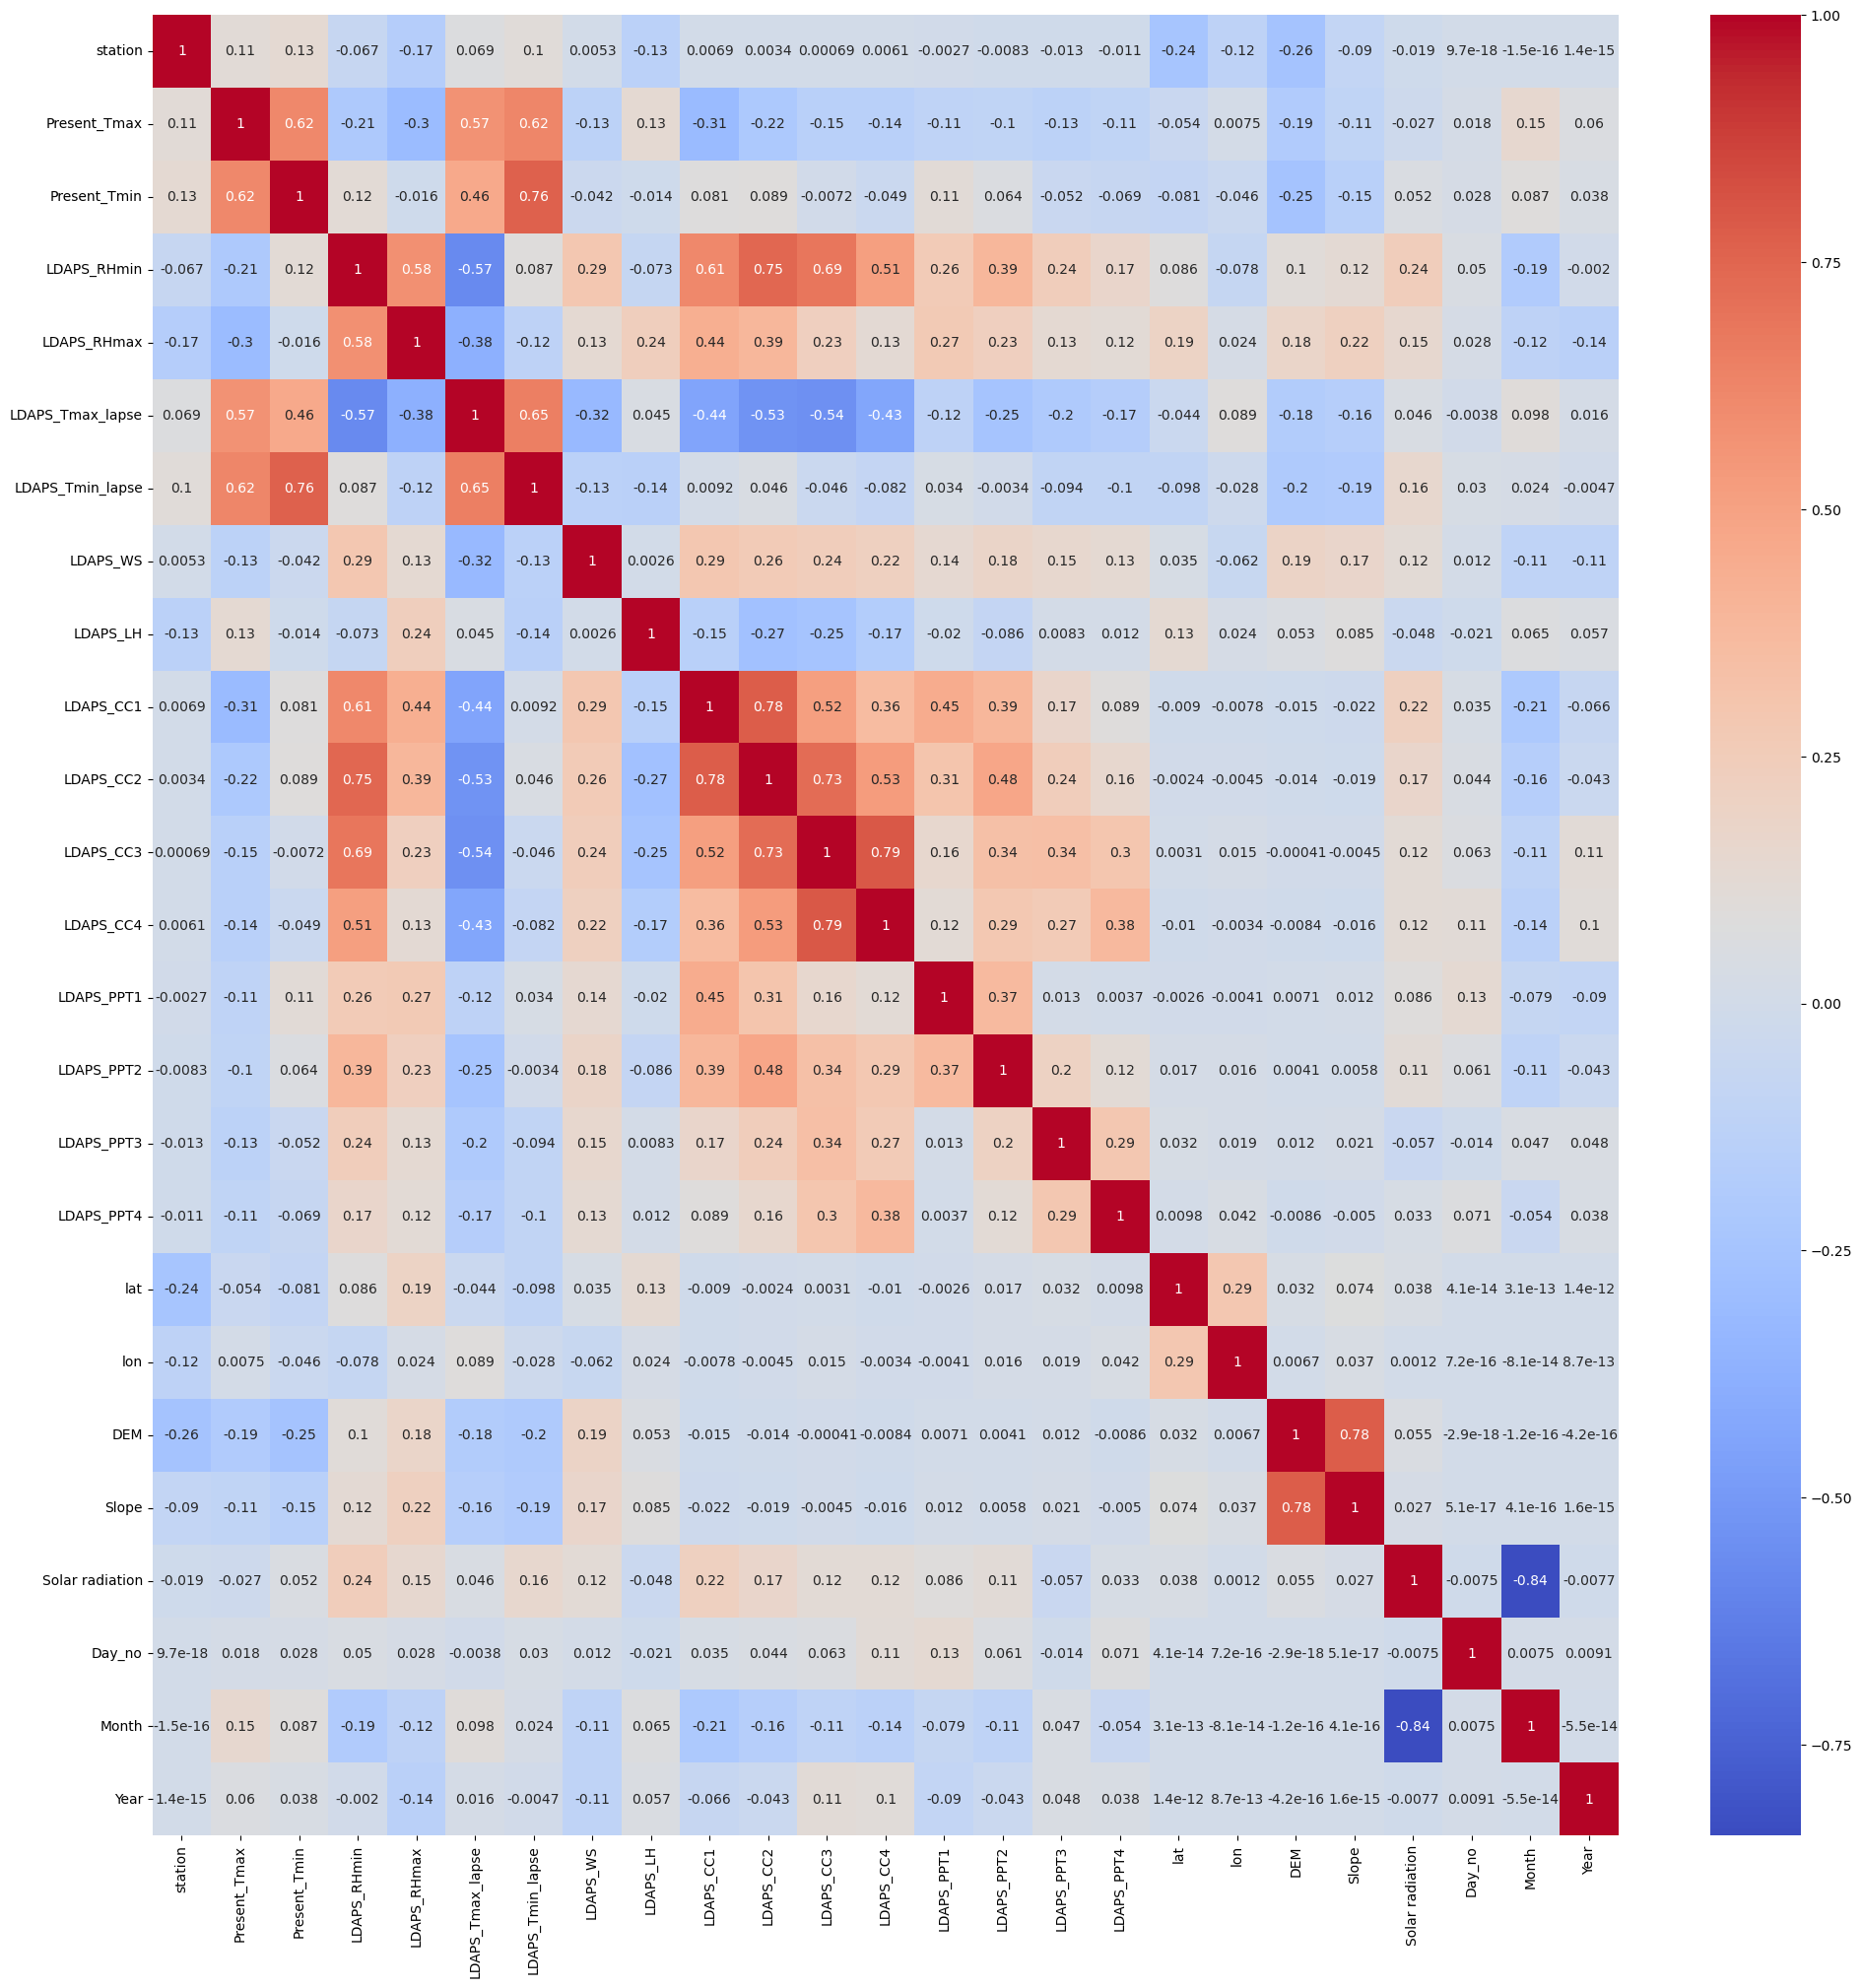

In [215]:
plt.figure(figsize=(24, 24))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()


In [218]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [219]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

0

**There is no correlation so need  for feature selection**

In [220]:
corr_features

set()

**We will divide the dataset for training and testing for model development.**

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train1,X_test1,y_train1,y_test1=train_test_split(X,z,test_size=0.3,random_state=42)

In [222]:
X_train.shape

(5425, 25)

In [223]:
X_test.shape

(2325, 25)

In [224]:
y_train.shape

(5425,)

In [225]:
y_test.shape

(2325,)

**RandomForest Regressor for y as dependent feature**

In [226]:
rdf=RandomForestRegressor()
rdf.fit(X_train,y_train)
y_pred1=rdf.predict(X_test)

In [227]:
y_pred1

array([29.634, 33.182, 34.951, ..., 29.317, 29.551, 25.852])

In [228]:
r2_score(y_pred1,y_test)

0.8783393928599991

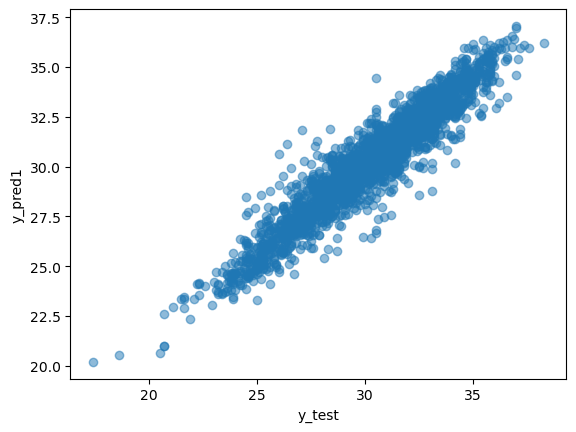

In [229]:
plt.scatter(y_test,y_pred1,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [230]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MAE:",mean_absolute_error(y_pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred1,y_test)))

MSE: 0.9575244817204297
MAE: 0.7281238709677417
RMSE: 0.9785317990338535


**RandomForest Regressor for z as dependent feature**

In [231]:
rdf1=RandomForestRegressor()
rdf1.fit(X_train1,y_train1)
pred1=rdf1.predict(X_test1)

In [232]:
pred1

array([21.426, 22.531, 24.667, ..., 18.86 , 24.025, 19.778])

In [233]:
r2_score(pred1,y_test1)

0.8827310869990335

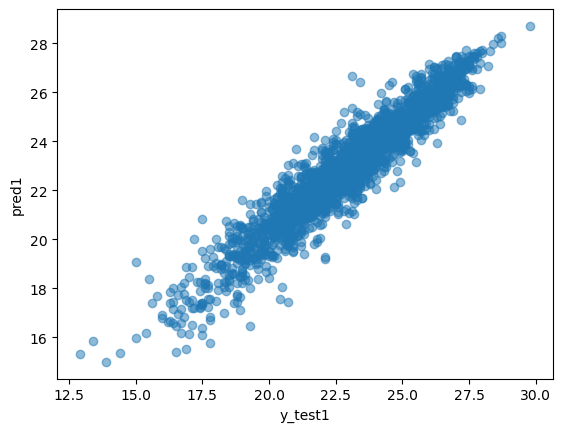

In [234]:
plt.scatter(y_test1,pred1,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred1")
plt.show()

In [235]:
print("MSE:",mean_squared_error(pred1,y_test1))
print("MAE:",mean_absolute_error(pred1,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred1,y_test1)))

MSE: 0.5949332993548391
MAE: 0.5837604301075271
RMSE: 0.7713191942087524


**AdaBoost Regressor for y as dependent feature**

In [236]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred2=ada.predict(X_test)

In [237]:
y_pred2

array([28.66918745, 33.02942857, 33.7272198 , ..., 29.2041876 ,
       29.17922078, 26.86497238])

In [238]:
r2_score(y_pred2,y_test)

0.5911460514870652

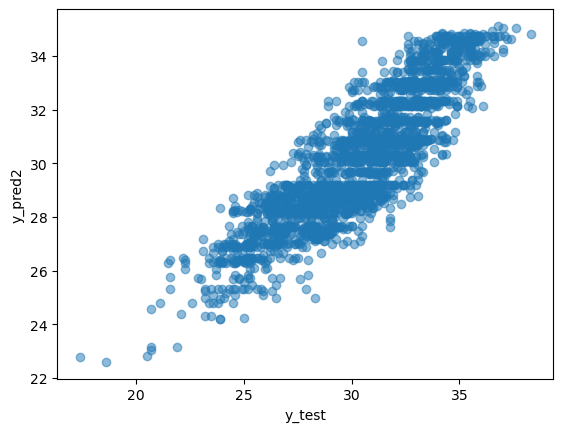

In [239]:
plt.scatter(y_test,y_pred2,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [240]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MAE:",mean_absolute_error(y_pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred2,y_test)))

MSE: 2.3471968805009746
MAE: 1.2373851581206037
RMSE: 1.5320564221010187


**AdaBoost Regressor for z as dependent feature**

In [241]:
ada1=AdaBoostRegressor()
ada1.fit(X_train1,y_train1)
pred2=ada1.predict(X_test1)

In [242]:
pred2

array([21.45199501, 23.01713748, 25.13235908, ..., 18.1702027 ,
       24.02755556, 20.20567791])

In [243]:
r2_score(pred2,y_test1)

0.7072781845745449

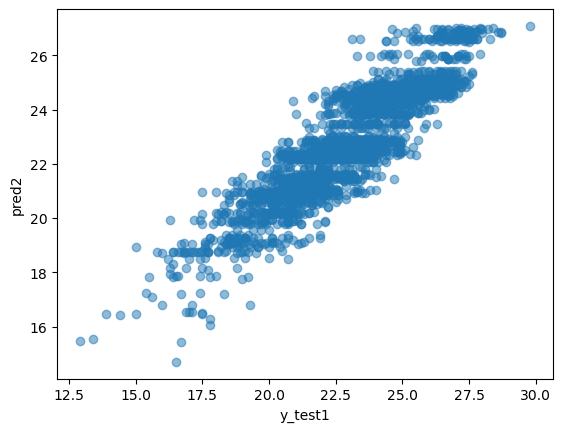

In [244]:
plt.scatter(y_test1,pred2,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred2")
plt.show()

In [245]:
print("MSE:",mean_squared_error(pred2,y_test1))
print("MAE:",mean_absolute_error(pred2,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test1)))

MSE: 1.2145687944428167
MAE: 0.8893240923163414
RMSE: 1.1020747680819196


**Gradient Boosting regressor for y as dependent feature**

In [246]:
gdr=GradientBoostingRegressor()
gdr.fit(X_train,y_train)
y_pred3=gdr.predict(X_test)

In [247]:
y_pred3

array([29.7636118 , 33.40582926, 34.36837067, ..., 29.21483207,
       29.7141262 , 25.28334166])

In [248]:
r2_score(y_pred3,y_test)

0.81278250665252

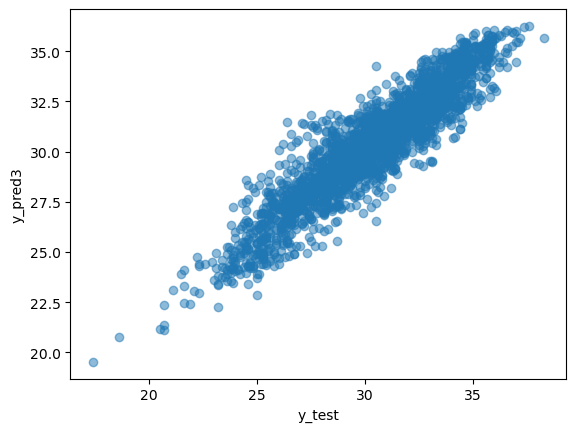

In [249]:
plt.scatter(y_test,y_pred3,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [250]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MAE:",mean_absolute_error(y_pred3,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred3,y_test)))

MSE: 1.4093847332712215
MAE: 0.9140270282449496
RMSE: 1.1871751064064735


**Gradient Boosting regressor as z as a dependent feature**

In [251]:
gdr1=GradientBoostingRegressor()
gdr1.fit(X_train1,y_train1)
pred3=gdr1.predict(X_test1)

In [252]:
pred3

array([21.90105435, 22.74672908, 25.40287328, ..., 18.30101728,
       23.81561316, 19.22683098])

In [253]:
r2_score(pred3,y_test1)

0.8658834661811623

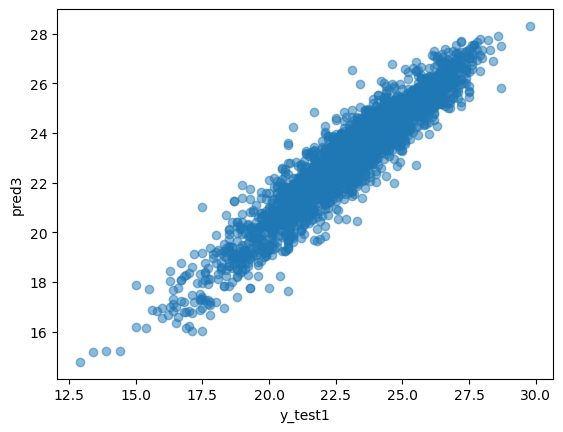

In [254]:
plt.scatter(y_test1,pred3,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred3")
plt.show()

In [255]:
print("MSE:",mean_squared_error(pred3,y_test1))
print("MAE:",mean_absolute_error(pred3,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred3,y_test1)))

MSE: 0.6736515823306692
MAE: 0.6444664906344054
RMSE: 0.8207628051579027


**LGBMRegressor as y as a dependent feature**

In [256]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
y_pred4=lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4247
[LightGBM] [Info] Number of data points in the train set: 5425, number of used features: 25
[LightGBM] [Info] Start training from score 30.278046


In [257]:
y_pred4

array([30.39901452, 33.21559261, 35.70445611, ..., 29.24974202,
       29.42686875, 25.51626908])

In [258]:
r2_score(y_pred4,y_test)

0.9170422659338613

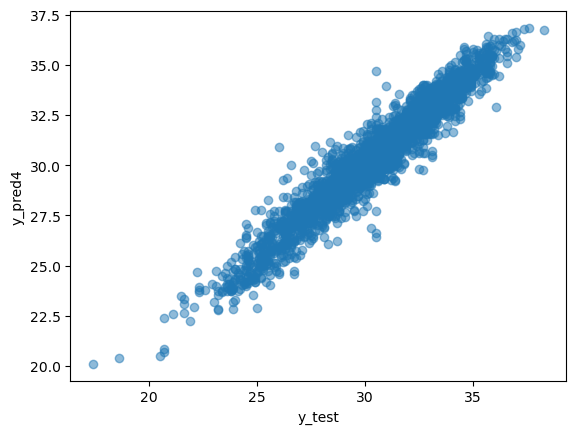

In [259]:
plt.scatter(y_test,y_pred4,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [260]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MAE:",mean_absolute_error(y_pred4,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred4,y_test)))

MSE: 0.7022877142708897
MAE: 0.6390186847438997
RMSE: 0.8380260820946385


**LGBMRegressor as z as a dependent feature**

In [261]:
lgbm1=LGBMRegressor()
lgbm1.fit(X_train1,y_train1)
pred4=lgbm1.predict(X_test1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4247
[LightGBM] [Info] Number of data points in the train set: 5425, number of used features: 25
[LightGBM] [Info] Start training from score 22.955373


In [262]:
pred4

array([22.00129039, 22.73725532, 25.40909982, ..., 18.20587951,
       24.02757658, 19.64977575])

In [263]:
r2_score(pred4,y_test1)

0.9243869283897803

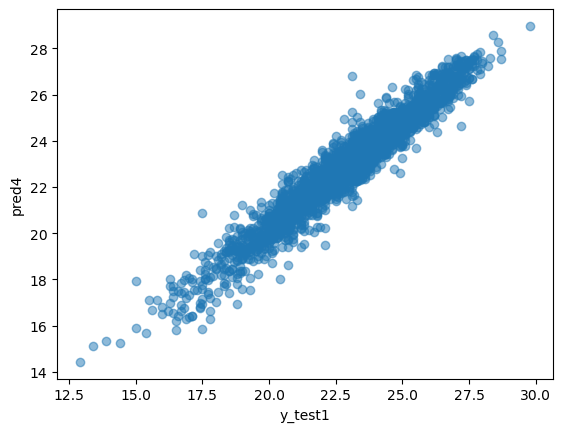

In [264]:
plt.scatter(y_test1,pred4,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred4")
plt.show()

In [265]:
print("MSE:",mean_squared_error(pred4,y_test1))
print("MAE:",mean_absolute_error(pred4,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred4,y_test1)))

MSE: 0.4020192957374741
MAE: 0.48836216572768654
RMSE: 0.6340499158090585


**XGBRegressor as y as a dependent feature**

In [266]:
xgb=xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [267]:
y_pred5

array([30.362045, 33.73186 , 35.99641 , ..., 29.192366, 29.60232 ,
       26.25043 ], dtype=float32)

In [268]:
r2_score(y_pred5,y_test)

0.917196858702953

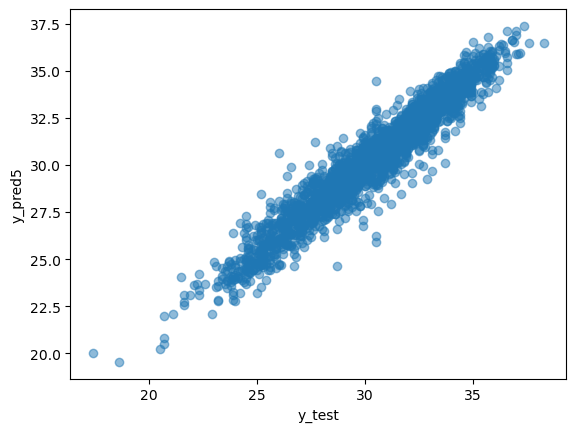

In [269]:
plt.scatter(y_test,y_pred5,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [270]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MAE:",mean_absolute_error(y_pred5,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred5,y_test)))

MSE: 0.7187117902748342
MAE: 0.6326047596264911
RMSE: 0.7953645451153145


**XGBRegressor as y as a dependent feature**

In [271]:
xgb1=xgboost.XGBRegressor()
xgb1.fit(X_train1,y_train1)
pred5=xgb1.predict(X_test1)

In [272]:
pred5

array([22.094273, 22.697466, 24.957087, ..., 17.669619, 24.370745,
       19.574497], dtype=float32)

In [273]:
r2_score(pred5,y_test1)

0.9200928016734304

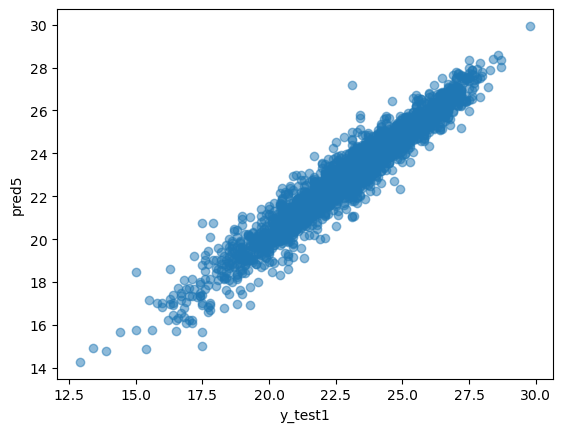

In [274]:
plt.scatter(y_test1,pred5,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred5")
plt.show()

In [275]:
print("MSE:",mean_squared_error(pred5,y_test1))
print("MAE:",mean_absolute_error(pred5,y_test1))
print("RMSE:",np.sqrt(mean_absolute_error(pred5,y_test1)))

MSE: 0.4352745360046128
MAE: 0.5023223611154864
RMSE: 0.7087470360541104


**LinearRegression as y as a dependent feature**



In [276]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred6=lr.predict(X_test)

In [277]:
y_pred6

array([29.42687906, 33.76354365, 32.93148733, ..., 29.93718056,
       30.1599483 , 25.49803857])

In [278]:
r2_score(y_pred6,y_test)

0.6925787471577023

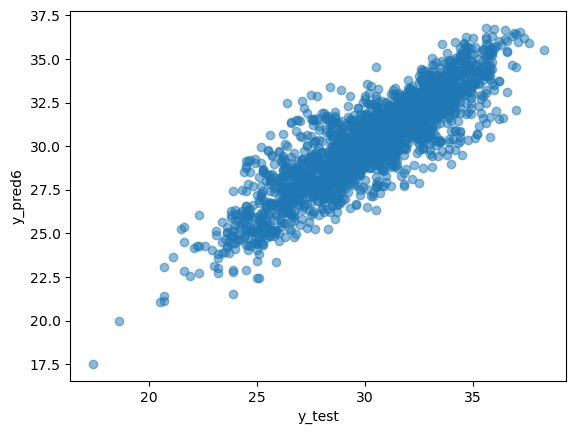

In [279]:
plt.scatter(y_test,y_pred6,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred6")
plt.show()

In [280]:
print("MSE:",mean_squared_error(y_pred6,y_test))
print("MAE:",mean_absolute_error(y_pred6,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred6,y_test)))

MSE: 2.212170744229345
MAE: 1.1098863076373133
RMSE: 1.0535114178960345


**LinearRegression as z as a dependent feature**


In [281]:
lr1=LinearRegression()
lr1.fit(X_train1,y_train1)
pred6=lr1.predict(X_test1)

In [282]:
pred6

array([21.49714415, 23.5978969 , 24.90305222, ..., 19.54719275,
       24.51396935, 19.12226614])

In [283]:
r2_score(pred6,y_test1)

0.7908040203642464

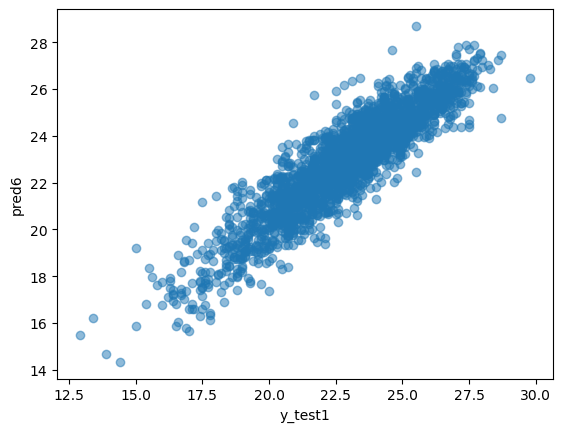

In [284]:
plt.scatter(y_test1,pred6,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred6")
plt.show()

In [285]:
print("MSE:",mean_squared_error(pred6,y_test1))
print("MAE:",mean_absolute_error(pred6,y_test1))
print("RMSE:",np.sqrt(mean_absolute_error(pred6,y_test1)))

MSE: 1.010975273296418
MAE: 0.78735261705888
RMSE: 0.8873289226994012


**Prediction using Randomforest and LGBMRegressor Algorithm(Because they are the best performing algorithms in this predictive modelling)**

In [286]:
X_test1.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
1894     20.0          28.8          22.5    56.959469    97.570969   
5834     10.0          32.5          23.1    35.915615    86.271225   
4922     23.0          33.8          23.5    47.242802    83.350937   
3091     17.0          29.0          17.2    40.723473    92.787651   
3149     25.0          28.0          21.8    26.133261    87.295136   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
1894         27.653456         21.419680  9.623752   66.007566   0.241352   
5834         32.666059         24.372431  6.144566   85.550835   0.002907   
4922         32.371778         26.166470  5.962029   90.959240   0.279242   
3091         27.799116         18.213853  4.216105  104.336004   0.104597   
3149         29.204623         20.661688  8.522427   21.892517   0.064970   

      ...  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
1894  ...         0.0    0.000000  37.6181  127.004  146.5540  4.7296   
5834  ...         0.0    0.000000  37.4562  126.955  208.5070  5.1782   
4922  ...         0.0    0.150047  37.5372  126.891   15.5876  0.1554   
3091  ...         0.0    0.000000  37.6181  127.099   53.4712  0.6970   
3149  ...         0.0    0.000000  37.5237  126.970   19.5844  0.2713   

      Solar radiation  Day_no  Month  Year  
1894      5820.243164       6      7  2014  
5834      4879.457031       1      8  2016  
4922      5759.948730       6      7  2016  
3091      4460.537109       5      8  2014  
3149      5849.743164       2      7  2015  

[5 rows x 25 columns]

In [287]:
prediction_t1=rdf.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Max Temperature:",prediction_t1,'C')
prediction_t2=rdf1.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Min Temperature:",prediction_t2,'C')

Max Temperature: [29.634] C
Min Temperature: [21.426] C


C:\Users\jcp95\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jcp95\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [288]:
prediction_t1=lgbm.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Max Temperature:",prediction_t1,'C')
prediction_t2=lgbm1.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Min Temperature:",prediction_t2,'C')

Max Temperature: [30.39901452] C
Min Temperature: [22.00129039] C


**Performance chart of all the alorithms that i haved used in this max and min temperature of predictive modelling**

**better>not better**

**LGBM > RandomForest > XGB > GradientBoosting > AdaBoost > Linear Regression**


**Conclusion: In this predictive modelling after using too many differnt types of algorithm i came to conclusion that LGBM and Random forest performed way better then any other algorithm other then that LGBM performance is even better then randomforest in terms accurate result as well as it is less time consuming algorithm then any other algorithm which i haved use in this predictive modelling.The most accurate result is give LGBM Algorithm**